## Telecom Customer Churn Prediction

# Load and Explore the data

Import the required libraries and read the dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

1. Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/TelcomCustomer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
863,9944-HKVVB,Female,0,No,No,3,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.10,307.4,Yes
660,5650-VDUDS,Female,0,No,No,4,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.25,96.05,Yes
2854,4644-PIZRT,Male,0,Yes,Yes,17,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),70.35,1201.65,No
3094,1898-JSNDC,Female,0,No,No,39,Yes,No,DSL,No,...,No,No,Yes,No,One year,Yes,Credit card (automatic),58.60,2224.5,No
186,4827-USJHP,Male,0,No,No,20,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,51.80,1023.85,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converting Total Charges to float data type

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning and Exploratory Data Analysis

3. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any

In [8]:
df.isnull().sum()/len(df)*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Replacing nan values with 0 in the Total Charges column to avoid error

In [9]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.isnull().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

4. Check if there are any duplicate records in the dataset? If any drop them

In [10]:
len(df[df.duplicated()])

0

5. Drop the columns which you think redundant for the analysis

In [11]:
df.drop(['customerID'],axis=1, inplace=True)
df_copy = df.copy()

6. Encode the categorical variables

In [12]:
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


7. Perform a detailed univariate, bivariate, and multivariate analysis with appropriate plots and add detailed comments after each analysis.

In [13]:
df_copy.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


1. The average Monthly charge is 64.76 and the max is 118.75 and min is 18.25
2. The average Total charge is 2279.73 and the max is 8684.80
3. The average Tenure duration is 32 months with a max of 72 months

In [14]:
df_copy.describe(include = 'O').T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


1. There are 4 types of payment methods and Electronic check is the most used one.
2. There are 3 types of Contracts and Month-to-month is opted the most.
3. There are 3 types of Internet Service and the most popular internet service is Fiber optic.

Plotting the correlation heatmap

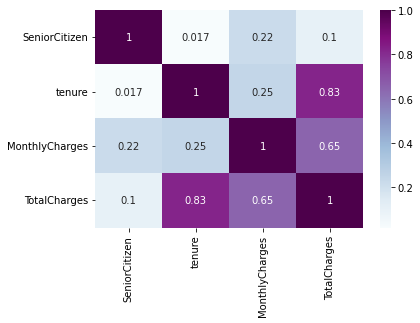

In [15]:
sns.heatmap(df_copy.corr(),annot=True,cmap='BuPu')
plt.show()

There is strong positive correlation between Total Charges and Tenure.

Visualizing Churn proportion

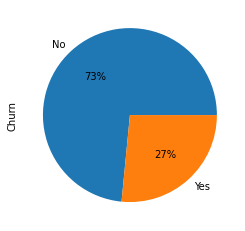

In [16]:
df_copy['Churn'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

It is seen from the graph that, 27% of the customers have already left in the last month

Checking the gender distribution of the customers

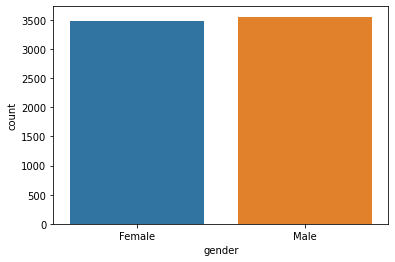

In [17]:
sns.countplot(df_copy['gender'])
plt.show()

The number of male and female customers are almost the equal but with the number of males slightly higher than female customers.

Checking the distribution of the column monthly charges.

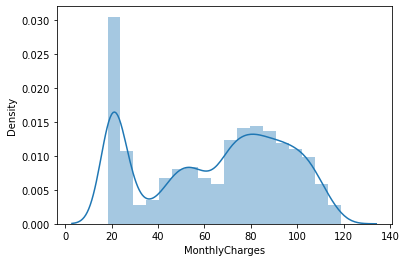

In [18]:
sns.distplot(df_copy['MonthlyCharges'])
plt.show()

$20 is the most common monthly charges pid by the customers

Checking the distribution of the column total charges.

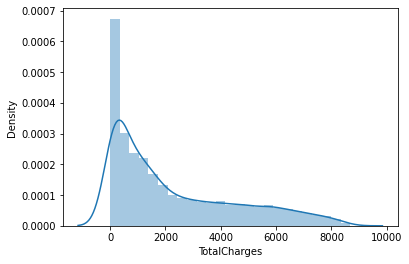

In [19]:
sns.distplot(df_copy['TotalCharges'])
plt.show()

plot shows that it is positively skewed  

Checking the distribution of the different PaymentMethod.

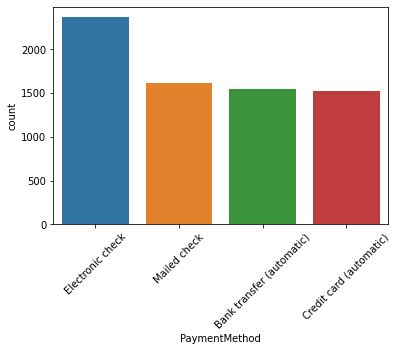

In [20]:
sns.countplot(df_copy['PaymentMethod'])
plt.xticks(rotation=45)
plt.show()

Form the above graph it is seen that, Four payment methods are used and electronic check is the commonly used method

Visualizing how churn interacts with tenure

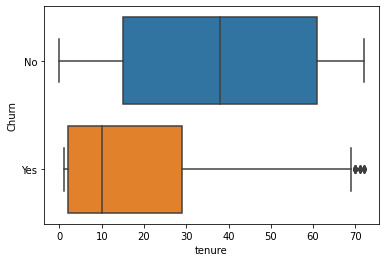

In [21]:
sns.boxplot(df_copy['tenure'],df_copy['Churn'])
plt.show()

From the above graph, the customers who stayed for 30 months are less likely to Churn.

Visualizing relationship monthlycharges Vs churn

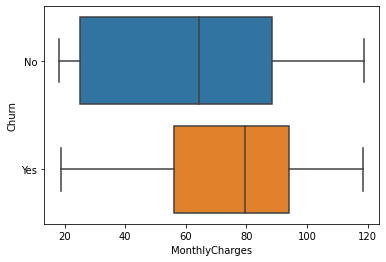

In [22]:
sns.boxplot(df_copy['MonthlyCharges'],df_copy['Churn'])
plt.show()

Customers with high monthly charges are the ones who left the company within the last month.

Visualizing relationship totalcharges Vs churn

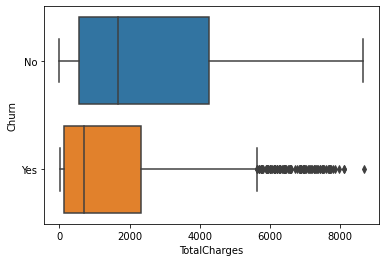

In [23]:
sns.boxplot(df_copy['TotalCharges'],df_copy['Churn'])
plt.show()

Customers who pay lower total charges are the ones who left the company within the last month.

Visualizing relationship contract Vs churn

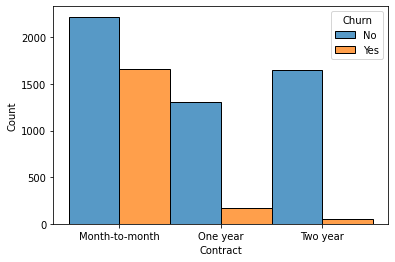

In [24]:
sns.histplot(binwidth=1, x='Contract', hue='Churn', data=df_copy, stat="count", multiple="dodge")
plt.show()

Most of the Customers who left the company were on Month-to-Month contact.

Checkig the relationship between tenure and the monthlycharges with respect to the target column Churn.

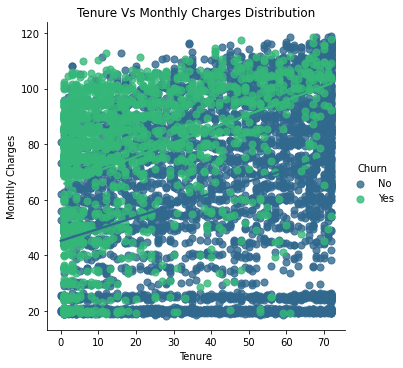

In [25]:
ax = sns.lmplot(height = 5, data = df_copy, x = 'tenure', y = 'MonthlyCharges',
              hue = 'Churn', scatter_kws={'s': 50}, line_kws = None, palette = 'viridis')
ax.set(xlabel = 'Tenure', ylabel = 'Monthly Charges')
ax = plt.title('Tenure Vs Monthly Charges Distribution')

Most of the customers who left were paying higher monthly charges as the concentration of customers who left is higher in the top left corner.

Checking the relationship between tenure and the totalcharges with respect to the target column Churn.

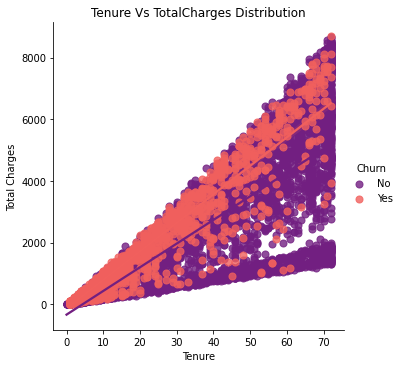

In [26]:
ax = sns.lmplot(height = 5, data = df_copy, x = 'tenure', y = 'TotalCharges',
              hue = 'Churn', scatter_kws={'s': 50}, line_kws = None, palette = 'magma')
ax.set(xlabel = 'Tenure', ylabel = 'Total Charges')
ax = plt.title('Tenure Vs TotalCharges Distribution')

1.   There is a linear relationship between Total charges and Tenure.
2.   There is large concentration of customers who left toward the starting point of the graph which means customers who had lower total charges and were not with the company for a very long time where the ones who left within the last month.




Checking the relationship between MonthlyCharges and the totalcharges with respect to the target column Churn.

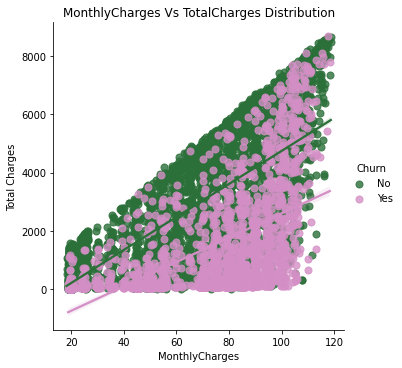

In [27]:
ax = sns.lmplot(height = 5, data = df_copy, x = 'MonthlyCharges', y = 'TotalCharges',
              hue = 'Churn', scatter_kws={'s': 50}, line_kws = None, palette = 'cubehelix')
ax.set(xlabel = 'MonthlyCharges', ylabel = 'Total Charges')
ax = plt.title('MonthlyCharges Vs TotalCharges Distribution')

1.   There is a linear relationship between Total Charges and Monthly Charges.
2.   There is large concentration of customers on the bottom right part of the plot meaning that the customers who had high monthly charges and low total charges were the ones who left the company within the last month.

# **Data Preparation for model building**

8. Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable

In [28]:
X=df.drop('Churn',axis=1)
y=df['Churn']

9. Split the dataset into two parts

In [29]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=25)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(4930, 19) (2113, 19)
(4930,) (2113,)


10. Standardize the columns using z-score scaling approach

In [30]:
ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4656,-1.009375,-0.442415,1.042272,1.531963,-0.420672,0.32729,1.121505,0.170887,-0.916352,-1.028801,-1.032087,-0.925154,-1.107982,-1.124687,-0.827880,0.83631,-1.474966,0.363097,-0.294547
1466,0.990712,-0.442415,1.042272,1.531963,-0.826630,0.32729,-0.987600,-1.187944,1.409918,-1.028801,-1.032087,-0.925154,-1.107982,-1.124687,-0.827880,0.83631,0.391217,-0.519556,-0.752690
5280,-1.009375,-0.442415,1.042272,1.531963,0.025881,0.32729,1.121505,-1.187944,-0.916352,-1.028801,1.238412,1.394790,1.151055,1.133849,0.367273,0.83631,0.391217,0.474258,0.107576
3443,0.990712,2.260320,1.042272,-0.652757,0.310051,0.32729,-0.987600,0.170887,1.409918,1.242577,1.238412,1.394790,1.151055,-1.124687,0.367273,0.83631,-0.541875,1.104724,0.803338
6787,0.990712,-0.442415,1.042272,1.531963,0.107072,0.32729,1.121505,0.170887,-0.916352,1.242577,1.238412,1.394790,1.151055,1.133849,-0.827880,0.83631,0.391217,1.496276,0.656585


In [31]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4864,0.990712,-0.442415,1.042272,-0.652757,1.568519,0.32729,1.121505,0.170887,-0.916352,1.242577,1.238412,1.394790,1.151055,1.133849,0.367273,0.836310,-1.474966,1.602460,2.486985
5033,-1.009375,-0.442415,-0.959442,-0.652757,-1.273183,0.32729,-0.987600,1.529719,0.246783,0.106888,0.103163,0.234818,0.021536,0.004581,-0.827880,0.836310,1.324309,-1.508392,-0.994829
2671,0.990712,-0.442415,-0.959442,-0.652757,1.243753,0.32729,1.121505,0.170887,-0.916352,1.242577,-1.032087,1.394790,1.151055,1.133849,-0.827880,-1.195729,0.391217,1.345296,1.942783
3919,-1.009375,-0.442415,-0.959442,-0.652757,-1.070205,0.32729,1.121505,0.170887,-0.916352,-1.028801,-1.032087,-0.925154,1.151055,1.133849,-0.827880,0.836310,-1.474966,0.952085,-0.767940
3630,-1.009375,-0.442415,-0.959442,-0.652757,-1.151396,0.32729,-0.987600,1.529719,0.246783,0.106888,0.103163,0.234818,0.021536,0.004581,-0.827880,-1.195729,-1.474966,-1.456959,-0.965820


# Model Building and Evaluation

11. Write a function.


> 1. Which can take the model and data as inputs.
2. Fit the model with the train data.
3. Make predictions on the test set.
4. Returns the Accuracy Score.

In [32]:
def fit_n_predict(model, X_train, X_test, y_train, y_test): 
    
    model.fit(X_train, y_train)
    
    pred=model.predict(X_test)
    
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy

12. Use the function and train a Logistic regression, KNN, and Naive Bayes, Decision tree, Random forest, Boosting and Stacking Classifier models and make predictions on test data.

In [33]:
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators = estimators, final_estimator=rf)

result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], 
                             ['Logistic Regression','Naive Bayes','KNN','Decision tree', 
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    
    result.loc[model_name] = fit_n_predict(model, X_train, X_test, y_train, y_test)

13. Display and compare all the models designed with their test accuracies.

In [34]:
result

,Accuracy
Logistic Regression,0.806436
Naive Bayes,0.765263
KNN,0.754378
Decision tree,0.724089
Random Forest,0.787033
Ada Boost,0.794605
Gradient Boost,0.800757
Stacking,0.774255


14. Select the final best trained model along with your detailed comments for selecting this model.


Logistic Regression can be selected as best model because it has more accuracy than other models

15. Write your conclusion on the results.

As per the EDA the customers who have higher monthly charges and have been with the company for lesser time are the ones who are more likely to Churn.

Also the Customers who have Month-to-Month contract are also more likely to leave as compared to the customers who are on a one or two year contract.

Logistic Regression is the highest accuracy model.